In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
bikesharing=pd.read_csv('day.csv')

In [3]:
bikesharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Step 1: Data Preprocessing

In [4]:
#convert the datatype of dteday column to datetime.

bikesharing['dteday'] =  pd.to_datetime(bikesharing['dteday'],format='%d-%m-%Y')
bikesharing['dteday'].dtype

dtype('<M8[ns]')

In [5]:
#Dropping the redundant variable holiday as the workingday column covers required information.

bikesharing.drop('holiday',axis=1,inplace=True)
bikesharing.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Dropping few more redundant columns.

bikesharing.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)
bikesharing.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Renaming some columns for better understanding

bikesharing.rename(columns={'hum':'humidity','cnt':'count','yr':'year','mnth':'month'},inplace=True)
bikesharing.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Encoding the labels and Visualization

## 1.Season

In [8]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikesharing['season'] = bikesharing['season'].map(codes)

In [9]:
bikesharing

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


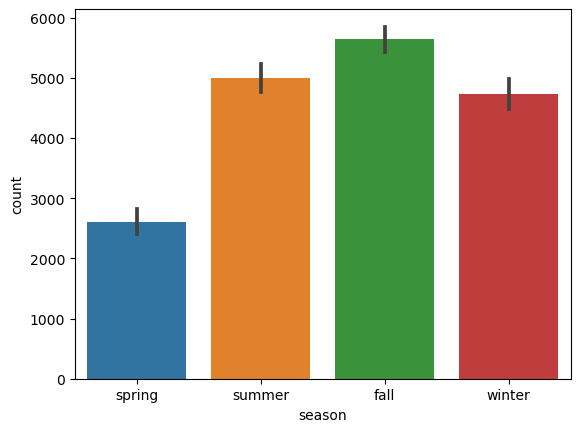

In [10]:
sns.barplot(data=bikesharing, x='season', y='count')
plt.show()

There are more rentals during Fall season

## 2.Weathersit

In [11]:
codes = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
bikesharing['weathersit'] = bikesharing['weathersit'].map(codes)

In [12]:
bikesharing

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,5,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,6,0,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,1,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


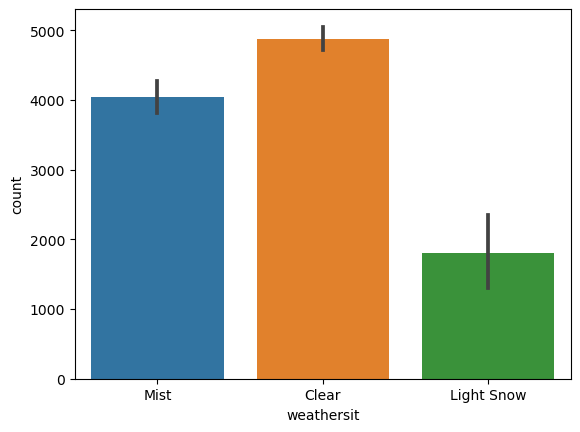

In [13]:
sns.barplot(x='weathersit',y='count',data=bikesharing)
plt.show()

Clearly more number of people rented when the weather was clear 

## 3.Working day 

In [14]:
codes = {1:'working_day',0:'Holiday'}
bikesharing['workingday'] = bikesharing['workingday'].map(codes)

In [15]:
bikesharing

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,1,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,2,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,3,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,4,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,5,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,5,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,6,Holiday,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,Holiday,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,1,working_day,Clear,10.489153,11.58500,48.3333,23.500518,1796


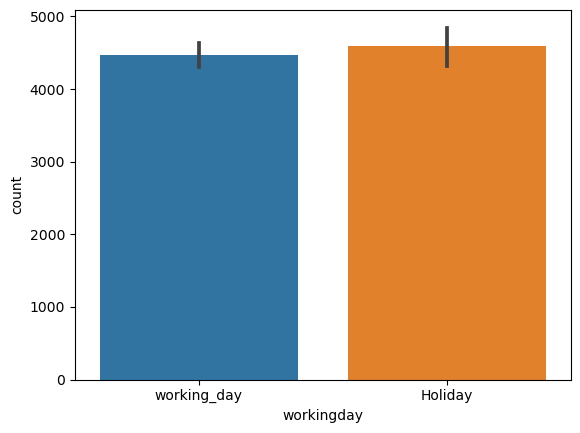

In [16]:
sns.barplot(x='workingday',y='count',data=bikesharing)
plt.show()

There is no much difference

## 4. Year 

<Axes: xlabel='year', ylabel='count'>

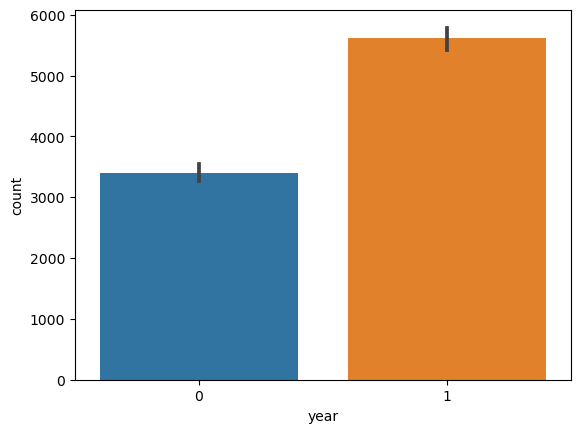

In [17]:
sns.barplot(x='year',y='count',data=bikesharing)

## 5 Month 

In [18]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikesharing['month'] = bikesharing['month'].map(codes)

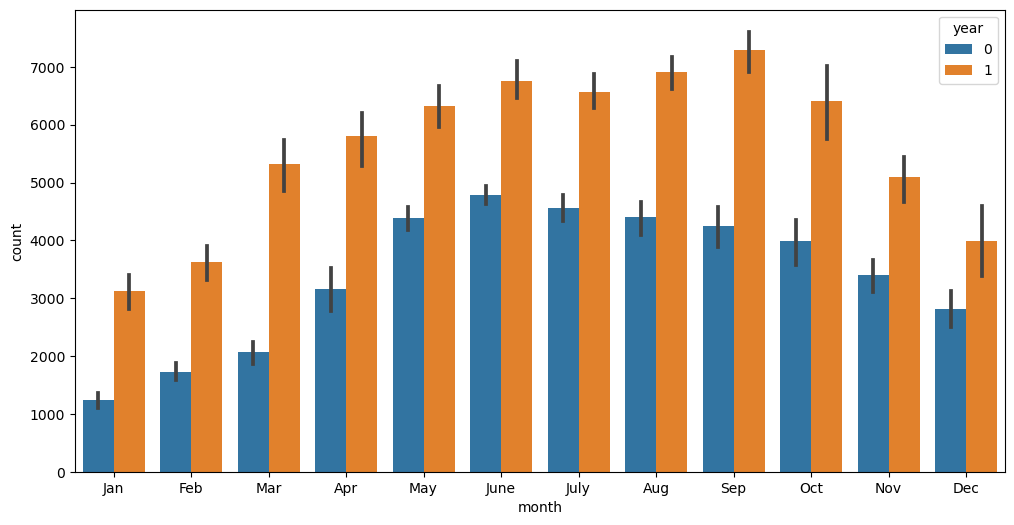

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', hue='year', data=bikesharing)
plt.show()

## 6.weekday 

In [20]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikesharing['weekday'] = bikesharing['weekday'].map(codes)

<Axes: xlabel='weekday'>

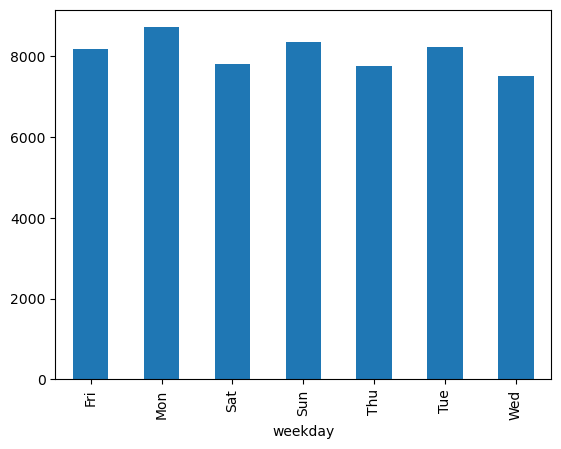

In [21]:
bikesharing.groupby('weekday')['count'].max().plot(kind='bar')

In [22]:
bikesharing

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Tue,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Wed,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Thu,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Fri,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Sat,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,Sat,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,Sun,Holiday,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,Mon,Holiday,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,Tue,working_day,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [23]:
X=bikesharing.iloc[:,:-1].values
y=bikesharing.iloc[:,-1].values

In [24]:
X

array([['spring', 0, 'Jan', ..., 18.18125, 80.5833, 10.749882],
       ['spring', 0, 'Jan', ..., 17.68695, 69.6087, 16.652113],
       ['spring', 0, 'Jan', ..., 9.47025, 43.7273, 16.636703],
       ...,
       ['spring', 1, 'Dec', ..., 12.12, 75.2917, 8.333661],
       ['spring', 1, 'Dec', ..., 11.585, 48.3333, 23.500518],
       ['spring', 1, 'Dec', ..., 11.17435, 57.75, 10.374682]],
      dtype=object)

In [25]:
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

# Step 3: One-Hot Encoding

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [27]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 3, 4, 5])], remainder='passthrough')

In [28]:
X = np.array(ct.fit_transform(X))

In [29]:
X

array([[0.0, 1.0, 0.0, ..., 18.18125, 80.5833, 10.749882],
       [0.0, 1.0, 0.0, ..., 17.68695, 69.6087, 16.652113],
       [0.0, 1.0, 0.0, ..., 9.47025, 43.7273, 16.636703],
       ...,
       [0.0, 1.0, 0.0, ..., 12.12, 75.2917, 8.333661],
       [0.0, 1.0, 0.0, ..., 11.585, 48.3333, 23.500518],
       [0.0, 1.0, 0.0, ..., 11.17435, 57.75, 10.374682]], dtype=object)

In [30]:
# Get the names of the one-hot encoded columns
one_hot_encoder = ct.named_transformers_['encoder']
encoded_column_names = one_hot_encoder.get_feature_names_out()

# Convert the encoded columns to a DataFrame for better visualization
encoded_df = pd.DataFrame(X[:, :len(encoded_column_names)], columns=encoded_column_names)



In [31]:
# Display the DataFrame
encoded_df.head()

,x0_fall,x0_spring,x0_summer,x0_winter,x1_Apr,x1_Aug,x1_Dec,x1_Feb,x1_Jan,x1_July,...,x2_Sat,x2_Sun,x2_Thu,x2_Tue,x2_Wed,x3_Holiday,x3_working_day,x4_Clear,x4_Light Snow,x4_Mist
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


oneHotEncoding for 'Season' column is X0 and:-

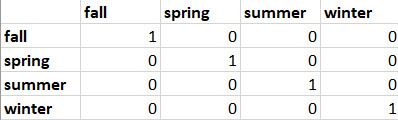


that is for fall :- 1000


oneHotEncoding for 'month' column is X1 and:

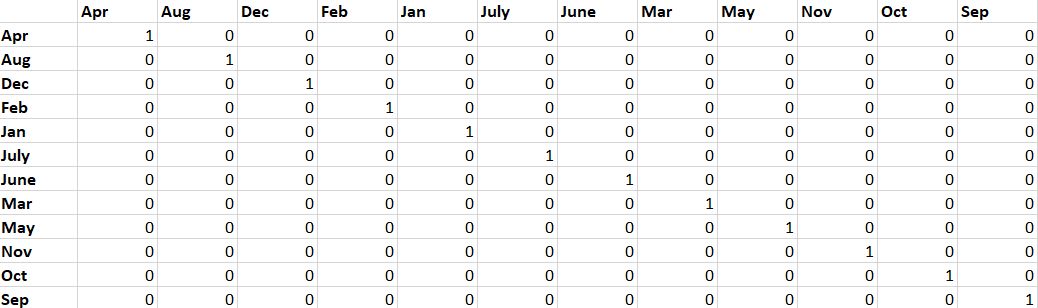

oneHotEncoding for 'weekday' column is X2 and :-


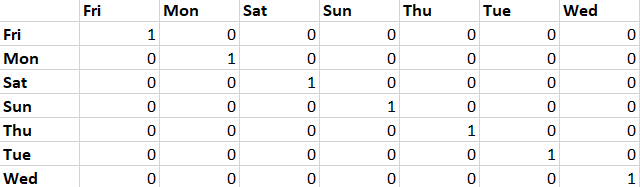

oneHotEncoding for 'workingday' column is X3 and :-

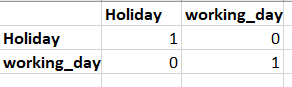

oneHotEncoding for 'weathersit' column is X4 and :-

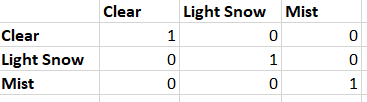

# Step 4:- Training and Test dataset

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
X_train

array([[1.0, 0.0, 0.0, ..., 32.39795, 56.1765, 20.412153],
       [0.0, 0.0, 1.0, ..., 16.22395, 83.625, 15.208464],
       [0.0, 0.0, 1.0, ..., 28.3454, 45.625, 5.626325],
       ...,
       [1.0, 0.0, 0.0, ..., 30.5244, 64.6667, 19.000061],
       [1.0, 0.0, 0.0, ..., 33.3021, 69.9167, 9.626493],
       [0.0, 0.0, 0.0, ..., 17.3602, 52.4583, 11.458675]], dtype=object)

In [34]:
y_train

array([4334, 1471, 8294, 8156, 2843, 3669, 8173, 1842,  683, 4549, 4634,
       6227, 1607, 2913, 5107, 5875, 6234, 4717, 1815, 6660, 1944, 7665,
       2933, 6544, 5805, 4308, 7001, 4333, 3606, 3403,  754, 4978, 4035,
        981, 7109, 4990, 1005, 6133, 3485, 6734, 3117, 5698, 5191, 3867,
       3944, 4154, 2034, 6883, 7328, 4153, 5170, 4765, 7460, 4486, 2743,
       1749, 4760, 4359, 5180, 4040, 3717, 1708, 6978, 7148, 3095, 3727,
       4378, 5478, 4906, 3456, 6861, 3974, 4332, 5130, 7498, 1406, 4966,
       7264, 7639, 6565,  920, 7384, 3915, 2999, 3922, 3805, 2471, 3249,
       2425, 2133, 2424, 7424, 5298, 3331, 5566, 2802, 4509, 6591, 7282,
       1204, 3784, 4484, 6118, 1510, 2423, 2417, 4911, 5847, 3598, 5728,
       3126, 5445, 4127, 4375, 2227, 3777, 2177, 4109, 3785, 3910, 4563,
       3840, 2485, 4881, 6460, 3068, 5084, 7605, 4105, 4758, 4790, 4648,
       5582, 6140, 4590, 3141, 7720, 4067, 8714, 1685, 2298, 5225,  985,
       2115, 4835, 7273, 2739, 3429, 3409, 5062, 49

# Step 5 :- Model Training

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=regressor.predict(X_test)

In [38]:
y_pred

array([4044. , 4675.5, 1122.5, 1098. , 3711. , 1712.5, 3872. , 5777. ,
       6197. ,  974. , 1441. , 1267.5, 1278. , 4969. , 4631.5, 3919.5,
       7165. , 5542.5, 3289. , 2728.5, 7228. , 3174. , 4989. , 4476.5,
       2078. , 5790.5, 5511. , 4937.5, 7291. , 6382. ,  523.5, 5415.5,
       6742. , 4759.5, 1935. , 3666. , 6916. , 6948.5, 2933. , 2900.5,
       2655.5, 1115.5, 5667. , 3750.5, 7111.5, 7181. , 3106.5, 4075. ,
       2965. , 2497.5, 6695.5, 6300.5, 6210. , 6477. , 4266. , 3467. ,
       2948.5, 5993.5, 6163. , 4010. , 6048. , 4002. , 6797. , 6995.5,
       6946. , 2908. , 5498.5, 4116.5, 6643. , 5084.5, 6745. , 6588. ,
       5230. , 6236. , 4334. , 5682. , 5994. , 6727.5, 2839.5, 2992.5,
       4886.5, 4972.5, 5184. , 1841. , 5100. , 6914.5, 5352.5, 5947. ,
       5517.5, 3861.5,  866. , 1879.5, 6789.5, 7180. , 6006.5, 2700.5,
        571. , 6623.5, 4601.5, 3838. , 4274. , 5501. , 4590.5, 6618. ,
       3403.5, 4881.5, 6327.5, 7461.5, 5258.5, 1462.5, 3409. , 4087.5,
      

In [39]:
y_test

array([5923, 4592, 1248, 1360, 4075, 1817, 2659, 6606, 5169, 1167, 1538,
       1162, 1461, 4833, 4342, 4010, 7767, 6852, 3376, 2077, 7350, 1341,
       5686, 4460, 1977, 6530, 3387, 5058, 7436, 7641,  822, 5115, 7691,
       5202, 2209, 4023, 6904, 4672, 2744, 2914, 1027,  801, 4839, 3487,
       7261, 7538, 1951, 3351, 2832, 1693, 5743, 7592, 5740, 7363, 4576,
       3071, 3613, 7509, 7216, 3272, 6624, 4318, 7591, 7333, 7736, 1996,
       5202, 4569, 6591, 5986, 7030, 7446, 5558, 7105, 3267, 5729, 6312,
       6784, 2431, 1796, 4475, 5259, 5362, 1812, 5010, 7702, 4792, 6421,
       7410, 4274, 1263,  623, 6685, 6824, 5115, 1013,  627, 7175, 3574,
       3830, 4352, 4220, 5501, 7570, 3523, 4302, 7359, 8555, 5936, 2660,
       4191, 3542, 3544, 1635, 2169, 4548, 4763, 4451, 7444, 6772, 1712,
       4507, 2927, 2294, 4195, 4630, 1650, 7055, 3129, 3239,  605, 7013,
       1450, 4304, 4270, 6093, 6370, 4539, 4985, 5345, 6304, 4595, 4459,
       5634, 5423, 7129], dtype=int64)

# Step 6 :- Model Evaluation

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8719477181975107

In [41]:
print(regressor.coef_)

[-3.18243817e+15 -3.18243817e+15 -3.18243817e+15 -3.18243817e+15
  1.38948385e+02  3.86887012e+01 -3.06397831e+02 -1.92825763e+02
 -3.07647666e+02 -4.41615018e+02  7.38426048e+01  2.33503859e+02
  3.76842910e+02 -4.34143339e+02  2.17412238e+02  6.49324840e+02
 -2.36230828e+01  4.24231612e+02 -7.00842290e+01  3.61618296e+02
 -1.55580881e+02 -2.71149763e+02 -2.70417751e+02 -1.61537783e+02
  1.61094173e+02  7.33780631e+02 -1.03892171e+03  2.98643821e+02
  1.94607521e+03  7.60387370e+01  3.52558600e+01 -1.65922398e+01
 -4.48337105e+01]


In [42]:
print(regressor.intercept_)

3182438171413431.5
